## Regression, ML Workflow, and Feature Engineering

### Box Office Predictions
#### Predict the profitability of a film before it’s released.

### Objectives 
#### 1. In general, is the profit of a movie correlated with its user score on IMDb? How about its number of votes? What do these correlations tell you?
#### 2. Using the data from 2014 and earlier, can you predict the profit of movies released in 2015 and 2016?
#### Tip: You should only use information that would be available BEFORE a movie is released (i.e. no information on user score, number of votes, or gross revenues).
#### 3. Let's say that you were able to show movies pre-release to a representative focus group, which accurately anticipates the score of a movie (but not its overall popularity), can you improve your model?

In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration

In [2]:
data = pd.read_csv("box_office_predictions.csv")

# Output first few rows
data.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


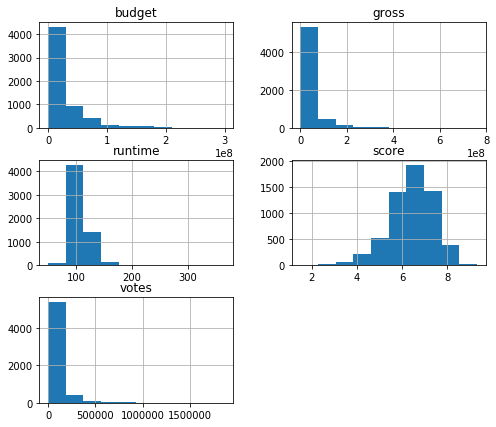

In [3]:
# Numeric feature distributions
data.hist(figsize=(8,7))
plt.show()

In [4]:
# Numeric feature summary statistics
data.describe()

,budget,gross,runtime,score,votes
count,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03
mean,2.469918e+07,3.341635e+07,106.587000,6.386383,7.188537e+04
std,3.721710e+07,5.735205e+07,18.026885,0.994921,1.308033e+05
min,0.000000e+00,4.410000e+02,50.000000,1.500000,2.700000e+01
25%,0.000000e+00,1.527796e+06,95.000000,5.800000,7.791750e+03
50%,1.100000e+07,1.229897e+07,102.000000,6.500000,2.660150e+04
75%,3.262500e+07,4.007256e+07,115.000000,7.100000,7.677475e+04
max,3.000000e+08,7.605076e+08,366.000000,9.300000,1.868308e+06


In [5]:
# Min budget is 0, so look at some entries with missing budget data (0 budget)
data[data.budget == 0].head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
56,0.0,UK,David Yates,Adventure,295983305.0,Harry Potter and the Deathly Hallows: Part 1 (...,PG-13,146,7.7,Daniel Radcliffe,Warner Bros.,370003
207,0.0,USA,Walt Becker,Action,168273550.0,Wild Hogs (2007),PG-13,100,5.9,Tim Allen,Touchstone Pictures,104657
431,0.0,USA,John G. Avildsen,Action,115103979.0,The Karate Kid Part II (1986),PG,113,5.9,Pat Morita,Columbia Pictures Corporation,58596
553,0.0,USA,Nora Ephron,Comedy,95318203.0,Michael (1996),PG,105,5.7,John Travolta,Turner Pictures (I),36553
592,0.0,USA,Tyler Perry,Comedy,90485233.0,Madea Goes to Jail (2009),PG-13,103,4.3,Tyler Perry,"Tyler Perry Company, The",10095


In [6]:
# Remove films with "0" budget
data = data.loc[data.budget > 0,:]

In [7]:
# Categorical feature summary statistics
data.describe(include=['object'])

,country,director,genre,name,rating,star,studio
count,4089,4089,4089,4089,4089,4089,4089
unique,42,1757,16,4089,8,1501,1232
top,USA,Woody Allen,Comedy,Toy Story 2 (1999),R,Nicolas Cage,Universal Pictures
freq,3275,26,1136,1,2001,36,235


In [8]:
# The star, director, and studio information might be too sparse. Unique too close to count, there are probably ways to
# combine this data to make it more useful. For name, if we extract 
# the year from the name, that info could be useful

### Feature Engineering

In [9]:
# The target variable is profit, which must be found using the gross and budget data
data['profit'] = data['gross'] - data['budget']

In [10]:
# Combine sparse classes so they have useful information

# Number of films from each studio
studio_counts = data.studio.value_counts()

# Tiers for sparser studios
one_timers = studio_counts[studio_counts <= 1].index
three_timers = studio_counts[(studio_counts > 1) & (studio_counts <= 3)].index
five_timers = studio_counts[(studio_counts > 3) & (studio_counts <= 5)].index
ten_timers = studio_counts[(studio_counts > 5) & (studio_counts <= 10)].index

# Combine sparse studios
data['studio'].replace(one_timers, 'One Timer', inplace=True)
data['studio'].replace(three_timers, 'Three Timer', inplace=True)
data['studio'].replace(five_timers, 'Five Timer', inplace=True)
data['studio'].replace(ten_timers, 'Ten Timer', inplace=True)

In [11]:
# Star

star_counts = data.star.value_counts()

# Tiers
one_time_star = star_counts[star_counts <= 1].index
three_time_star = star_counts[(star_counts > 1) & (star_counts <= 3)].index
five_time_star = star_counts[(star_counts > 3) & (star_counts <= 5)].index
ten_time_star = star_counts[(star_counts > 5) & (star_counts <= 10)].index

# Combine sparse stars
data['star'].replace(one_time_star, 'One Timer', inplace=True)
data['star'].replace(three_time_star, 'Three Timer', inplace=True)
data['star'].replace(five_time_star, 'Five Timer', inplace=True)
data['star'].replace(ten_time_star, 'Ten Timer', inplace=True)


In [12]:
# Director
dir_counts = data.director.value_counts()

# Tiers
one_time_dir = dir_counts[dir_counts <= 1].index
three_time_dir = dir_counts[(dir_counts > 1) & (dir_counts <= 3)].index
five_time_dir = dir_counts[(dir_counts > 3) & (dir_counts <= 5)].index
ten_time_dir = dir_counts[(dir_counts > 5) & (dir_counts <= 10)].index

# Combine sparse stars
data['director'].replace(one_time_dir, 'One Timer', inplace=True)
data['director'].replace(three_time_dir, 'Three Timer', inplace=True)
data['director'].replace(five_time_dir, 'Five Timer', inplace=True)
data['director'].replace(ten_time_dir, 'Ten Timer', inplace=True)

In [13]:
# For country, group all countries with fewer than 50 films into a single 'Other' class.

# Number of films from each country
country_counts = data.country.value_counts()

# Combine countries with fewer than 50 films
other_countries = country_counts[country_counts < 40].index
data['country'].replace(other_countries, 'Other', inplace=True)

# New class frequencies
data.country.value_counts()

USA        3275
UK          323
Other       243
France       98
Germany      81
Canada       69
Name: country, dtype: int64

In [14]:
# Number of films in each genre
genre_counts = data.genre.value_counts()

# Combine genres with fewer than 50 films
other_genres = genre_counts[genre_counts < 50].index
data['genre'].replace(other_genres, 'Other', inplace=True)

# New genre frequencies
data.genre.value_counts()

Comedy       1136
Action        972
Drama         719
Crime         315
Adventure     253
Animation     205
Biography     203
Horror        201
Other          85
Name: genre, dtype: int64

In [15]:
data.rating.value_counts()

R                2001
PG-13            1372
PG                562
G                  90
NOT RATED          36
UNRATED            15
NC-17               9
Not specified       4
Name: rating, dtype: int64

In [16]:
# Combine no ratings
data['rating'].replace(['NOT RATED', 'UNRATED', 'Not specified'], 'NR', inplace=True)

In [17]:
# create an age feature for the age of the film

def extract_age(s, today=2014):
    ''' Set "today" to 2014 to imitate an analysis performed in 2014 to predict films in 2015 and 2016. '''
    return today - int( s[-5:-1] )

# Example
print(extract_age('Titanic (1997)'))

# Create "age" feature
data['age'] = data.name.apply(extract_age)

17


In [18]:
data.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,profit,age
0,237000000.0,UK,Five Timer,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Three Timer,Twentieth Century Fox Film Corporation,958400,523507625.0,5
1,200000000.0,USA,Five Timer,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,458672302.0,17
2,150000000.0,USA,Three Timer,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Three Timer,Universal Pictures,470625,502270625.0,-1
3,220000000.0,USA,Three Timer,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Ten Timer,1069292,403357910.0,2
4,185000000.0,USA,Ten Timer,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,349858444.0,6


### Correlations

In [19]:
# Correlations
data[['score', 'votes', 'profit', 'budget']].corr()

,score,votes,profit,budget
score,1.000000,0.469748,0.249742,0.067490
votes,0.469748,1.000000,0.500129,0.452685
profit,0.249742,0.500129,1.000000,0.094817
budget,0.067490,0.452685,0.094817,1.000000


### Machine Learning
#### Predict 2015 and 2016 Data

In [23]:
# imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# drop name because it acts as an index
# drop gross, votes, score because you wouldn't know them at prediction time

abt = pd.get_dummies(data.drop(['name', 'gross', 'votes', 'score'], axis = 1))

In [27]:
# train is 2014 and earlier, test is 2015 and 2016
train = abt[abt.age >= 0]
test = abt[abt.age < 0]

y_train = train.profit
X_train = train.drop(['profit'], axis=1)

y_test = test.profit
X_test = test.drop(['profit'], axis=1)


In [31]:
# Train random forest

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

C:\Users\Najla\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


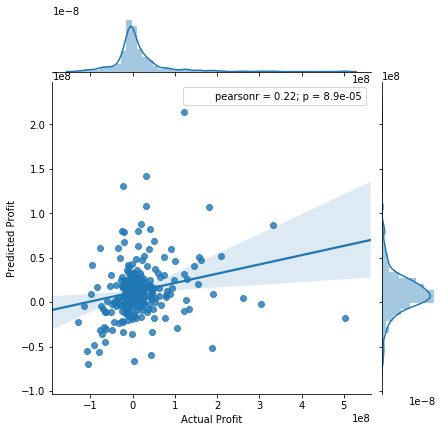

In [32]:
import seaborn as sns
sns.jointplot(y_test, pred, kind='reg')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

In [33]:
# R^2
r2_score(y_test, pred)

-0.00795636789533627

In [34]:
# Helper function for plotting feature importances
def plot_feature_importances(columns, feature_importances, show_top_n=10):
    feats = dict( zip(columns, feature_importances) )
    imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    imp.sort_values(by='Gini-importance').tail(show_top_n).plot(kind='barh', figsize=(8,8))
    plt.show()

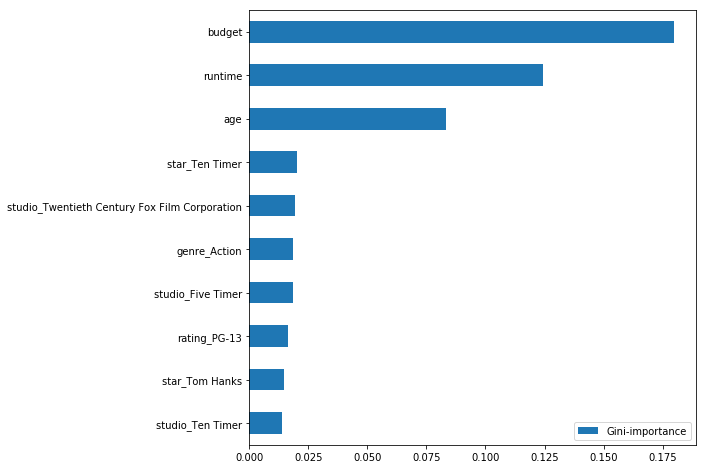

In [35]:
plot_feature_importances(X_train.columns, rf.feature_importances_)

## Machine Learning w/ Pre-Screen
#### Create a new analytical base table for the scenario where we're able to collect an accurate score input based on film pre-screenings.

In [38]:
# Create new analytical base table (ABT)
abt_ps = pd.get_dummies ( data.drop(['name', 'gross', 'votes'], axis=1) )

In [39]:
train = abt_ps[abt_ps.age >= 0]
test = abt_ps[abt_ps.age <= 0]

y_train = train.profit
X_train = train.drop(['profit'], axis=1)

y_test = test.profit
X_test = test.drop(['profit'], axis=1)

In [40]:
# Train a basic random forest model
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train, y_train)

# Make prediction on test set
pred = rf.predict(X_test)

C:\Users\Najla\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


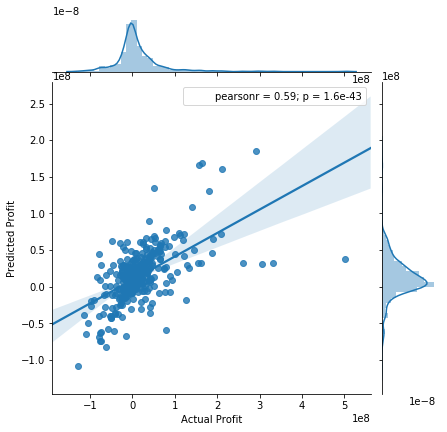

In [41]:
# new model performance 

sns.jointplot(y_test, pred, kind='reg')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

In [42]:
r2_score(y_test, pred)

0.34504043080338764

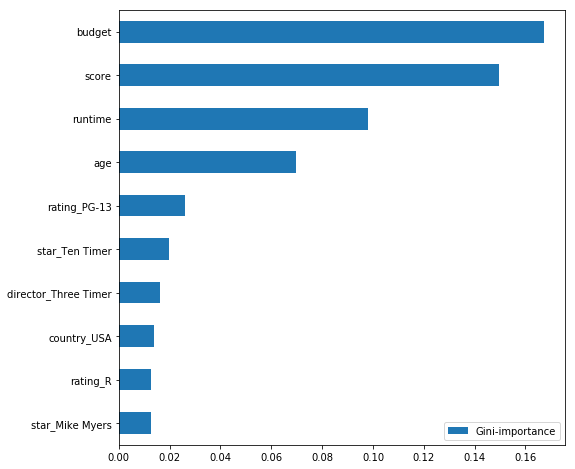

In [43]:
plot_feature_importances(X_train.columns, rf.feature_importances_)